# 单变量线性回归

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

A=np.eye(5)
A.shape

(5, 5)

In [2]:
path="C:\\Users\\ha'er\\Desktop\\cpp_work\\ex1-linear regression\\ex1data1.txt"  #数据
data=pd.read_table(path,header=None,sep=',',names=['Population','Profit'])
data.head()


,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


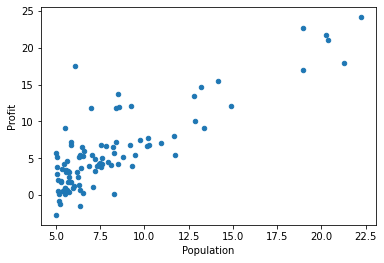

In [4]:
data.plot(kind='scatter',x='Population',y='Profit') #构造散点图scatter
plt.show()

In [5]:
#computeCost用于计算以参数θ为特征函数的代价函数
def computeCost(X,Y,Theta):
    inner=np.power(((X*Theta.T)-Y),2)
    return np.sum(inner)/(2*len(X))
    pass 

In [6]:
#x0=1 x1=X(0) 在X中插入x0
data.insert(0,'Ones',1)
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [7]:
#col为data的列数 X为data的前两列 Y为data的最后一列
col=data.shape[1]
X=data.iloc[:,0:col-1]
Y=data.iloc[:,col-1:col]

In [8]:
#查看dataframeX
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [9]:
#查看dataframeY
Y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [10]:
#将X、Y从dataframe类型转成矩阵（多维数组）,并且创建向量θ
X=np.matrix(X.values)
Y=np.matrix(Y.values)
Theta=np.matrix(np.array([0,0]))

In [11]:
X.shape,Y.shape,Theta.shape

((97, 2), (97, 1), (1, 2))

In [12]:
computeCost(X, Y, Theta)

32.072733877455676

In [13]:
#批量梯度下降(矩阵X，向量Y，特征向量Theta，学习速率alpha和迭代次数iter_cnt)
def GradientDescent(X,Y,Theta,alpha,iter_cnt):
    Theta_temp=np.matrix(np.zeros(Theta.shape))
    cost=np.zeros(iter_cnt)
    for i in range(iter_cnt):
        error=(X*Theta.T)-Y
        for j in range(Theta.shape[1]):
            temp=np.multiply(error,X[:,j])
            Theta_temp[0,j]=Theta[0,j]-np.sum(temp)*(alpha/len(X))
        Theta=Theta_temp
        cost[i]=computeCost(X, Y, Theta)
    return Theta,cost
    pass


In [14]:
#学习速率alpha=0.01 执行的迭代次数iter_cnt=1000
alpha = 0.01 
iter_cnt = 1000

In [15]:
#调用GradientDescent
g, cost = GradientDescent(X, Y, Theta, alpha, iter_cnt)


In [16]:
#查看g，cost
g,cost

(matrix([[-3.24140214,  1.1272942 ]]),
 array([6.73719046, 5.93159357, 5.90115471, 5.89522859, 5.89009494,
        5.88500416, 5.87993248, 5.87487909, 5.86984391, 5.86482687,
        5.85982789, 5.85484692, 5.84988389, 5.84493874, 5.8400114 ,
        5.83510181, 5.8302099 , 5.82533562, 5.82047889, 5.81563965,
        5.81081784, 5.8060134 , 5.80122627, 5.79645638, 5.79170367,
        5.78696808, 5.78224955, 5.77754801, 5.77286341, 5.76819568,
        5.76354477, 5.75891061, 5.75429313, 5.7496923 , 5.74510803,
        5.74054027, 5.73598897, 5.73145406, 5.72693549, 5.72243319,
        5.71794711, 5.71347718, 5.70902336, 5.70458558, 5.70016379,
        5.69575792, 5.69136792, 5.68699373, 5.6826353 , 5.67829257,
        5.67396548, 5.66965398, 5.665358  , 5.6610775 , 5.65681242,
        5.6525627 , 5.64832829, 5.64410913, 5.63990517, 5.63571635,
        5.63154261, 5.62738391, 5.6232402 , 5.6191114 , 5.61499748,
        5.61089837, 5.60681403, 5.60274441, 5.59868944, 5.59464907,
        5

In [17]:
#使用拟合的参数计算训练模型的代价函数（误差）
computeCost(X, Y, g)

4.515955503078914

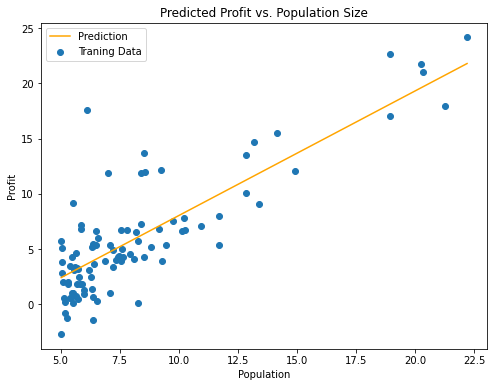

In [18]:
#绘制线性模型以及数据，直观地看出它的拟合
x=np.linspace(data.Population.min(),data.Population.max(),200)
f=g[0,0]+(g[0,1]*x)#f就是拟合的y向量

#subplots()是一个返回包含图形和轴对象的元组的函数.fig:改变人物级别的属性或保存数字作为以后的图像文件是非常有用的
fig,ax=plt.subplots(figsize=(8,6))
ax.plot(x,f,'orange',label="Prediction")
ax.scatter(data.Population,data.Profit,label="Traning Data")
ax.legend(loc=2)#图例的位置在图的第二象限（loc=1在第一象限）
ax.set_xlabel("Population")
ax.set_ylabel("Profit")
ax.set_title('Predicted Profit vs. Population Size')
plt.show()


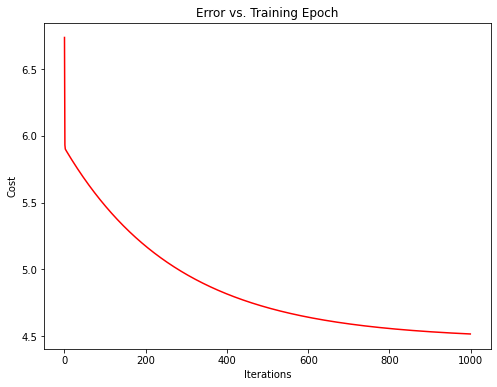

In [19]:
#由于梯度方程式函数也在每个训练迭代中输出一个代价的向量，绘制下取曲线。 请注意，代价总是降低（凸优化）。
fig,ax=plt.subplots(figsize=(8,6))
ax.plot(np.arange(iter_cnt),cost,'red')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

# 多变量线性回归

In [20]:
# path="C:\\Users\\ha'er\\Desktop\\cpp_work\\ex1-linear regression\\ex1data2.txt" #绝对路径
path="ex1data2.txt" #相对路径
data2=pd.read_table(path,header=None,sep=",",names=["Size","Bedrooms","Price"])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [21]:
#特征归一化
data2=(data2-data2.mean())/data2.std() #((x-u)/σ)(u:平均值;σ:标准差)
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [22]:
#重复第1部分的预处理步骤，并对新数据集运行线性回归程序
data2.insert(0,"Ones",1) #加入x0

In [23]:
cols=data2.shape[1]
X2=data2.iloc[:,0:cols-1]
Y2=data2.iloc[:,cols-1:cols]

X2=np.matrix(X2.values)
Y2=np.matrix(Y2.values)
Theta2=np.matrix(np.array([0,0,0]))

In [24]:
g2,cost2=GradientDescent(X2, Y2, Theta2, alpha, iter_cnt)

computeCost(X2, Y2, g2)

0.1307033696077189

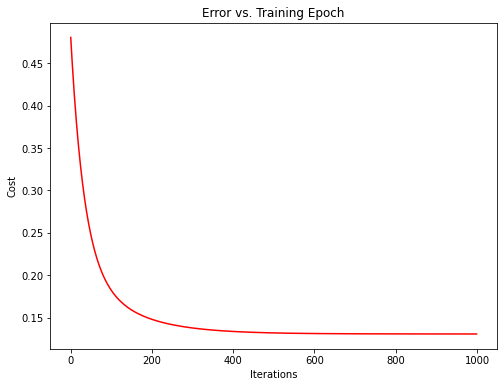

In [25]:
fig,ax=plt.subplots(figsize=(8,6))
ax.plot(np.arange(iter_cnt),cost2,'red')
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
ax.set_title("Error vs. Training Epoch")
plt.show()

## scikit-learn的线性回归函数

In [26]:
from sklearn import linear_model
model=linear_model.LinearRegression()
model.fit(X,Y)

LinearRegression()

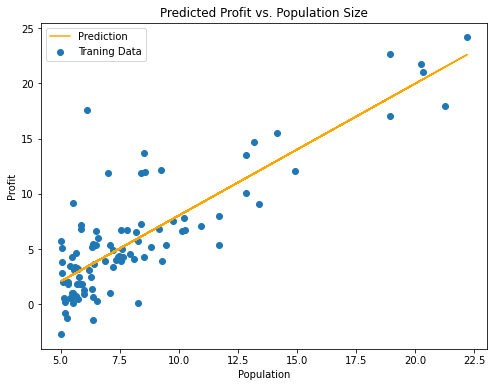

In [27]:
#绘制线性模型以及数据，直观地看出它的拟合
x=X[:,1].A1.flatten()
f=model.predict(X).flatten()#f就是拟合的y向量 flatten返回一个一维数组

#subplots()是一个返回包含图形和轴对象的元组的函数.fig:改变人物级别的属性或保存数字作为以后的图像文件是非常有用的
fig,ax=plt.subplots(figsize=(8,6))
ax.plot(x,f,'orange',label="Prediction")
ax.scatter(data.Population,data.Profit,label="Traning Data")
ax.legend(loc=2)#图例的位置在图的第二象限（loc=1在第一象限）
ax.set_xlabel("Population")
ax.set_ylabel("Profit")
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

## normal equation（正规方程）

假设我们的训练集特征矩阵为X（包含了$x_0=1$）并且我们的训练集结果为向量y,用正规方程解出向量$θ=(X^TX)^{-1}X^TY$.
梯度下降与正规方程的比较：
梯度下降需要选择学习率α，需要多次迭代，当特征数量n大时也能较好适用，适用于各种类型的模型;
正规方程不需要选择学习率α，一次计算得出，如果特征数量n较大则运算代价大,通常来说当n nn小于10000 时还是可以接受的，只适用于线性模型，不适合逻辑回归模型等其他模型.

In [28]:
def normalEqn(X,Y):
    Theta=np.linalg.inv(X.T@X)@X.T@Y
    return Theta

In [29]:
Normal_Theta=normalEqn(X, Y)
Normal_Theta

matrix([[-3.89578088],
        [ 1.19303364]])

梯度下降求出来的g=(matrix([[-3.24140214,  1.1272942 ]])